## STFT

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

def calc_dft(x):
    
    N = len(x)
    n = np.arange(N)
    X = np.zeros(N, dtype=complex)
    
    for k in range(N):
        X[k] = np.sum(x * np.exp(-1j * 2 * np.pi * n * k / N))
    
    return X

## STFT Implementierung

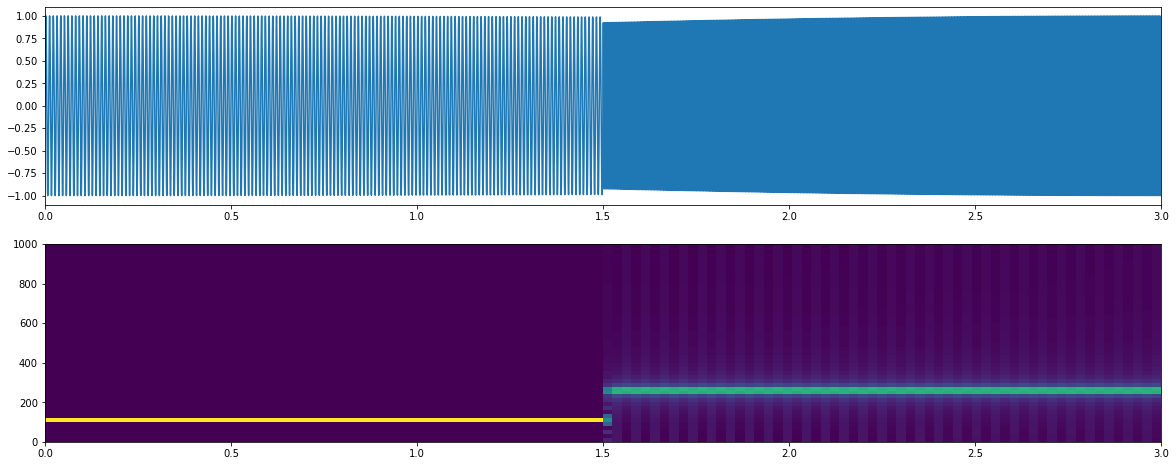

In [2]:
sr = 2000
freq1, freq2 = 100, 250
length = 3
t = np.linspace(0, length, sr * length)

x = np.concatenate([
        (np.sin(t[:sr * length // 2] * 2 * np.pi * freq1)), \
        (np.sin(t[sr * length // 2:] * 2 * np.pi * freq2))])

display(Audio(x, rate=sr))


# see time-framing

hop_size = 50
window_size = 100
num_windows = (len(x) - window_size) // hop_size

stft = np.zeros((window_size, num_windows), dtype=complex)

for win_idx in range(num_windows):
    start_i = win_idx * hop_size
    stop_i = start_i + window_size
    win = x[start_i:stop_i]
    
    stft[:, win_idx] = calc_dft(win)



plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlim(0, length)

plt.subplot(2, 1, 2)
plt.imshow(np.abs(stft), origin='lower', aspect='auto', extent=[0, length, 0, sr])
plt.ylim(0, sr / 2)
plt.show()